# Flight Delay Prediction using Gaussian NaiveBayes

### Problem Statement

Predicting flight delays can be useful to a variety of organizations: airport authorities, airlines, and aviation authorities. If such an organization were to provide ongoing real-time assistance with flight delays, it would benefit from some advance notice about flights that are likely to be delayed.


### Goal

The goal is to accurately predict whether or not a new flight, will be delayed. The outcome variable is whether the flight was delayed, and thus it has two classes (1 = delayed and 0 = on time).

We will use Gaussian Naive Bayes model for the above prediction

#### Workflow

In this simplified illustration, we look at five predictors, or features.

    1. Day of the Week
    2. Departure Time
    3. Origin
    4. Destination
    5. Carrier
    
The outcome of interest is whether or not the flight is delayed. Our data consist of all flights from the Washington, DC area into the New York City area during January 2004.

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data

In [2]:
flight = pd.read_excel(r"C:\Users\sundh\Downloads\Telegram Desktop\Flight Data (2).xlsx")

In [3]:
flight.head()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,2004-01-01 00:00:00,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,2004-01-01 00:00:00,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,2004-01-01 00:00:00,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,2004-01-01 00:00:00,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,2004-01-01 00:00:00,7792,IAD,4,1,ontime


In [4]:
flight.shape

(2199, 10)

In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Carrier           2199 non-null   object
 1   Departure Time    2199 non-null   int64 
 2   Destination       2199 non-null   object
 3   Distance          2199 non-null   int64 
 4   Date              2199 non-null   object
 5   Flight Number     2199 non-null   int64 
 6   Origin            2199 non-null   object
 7   Day of the Week   2199 non-null   int64 
 8   Day of the Month  2199 non-null   int64 
 9   Delayed           2199 non-null   object
dtypes: int64(5), object(5)
memory usage: 171.9+ KB


### Numerical and Categorical Features in the Dataset

##### Numerical
    
    1. Departure Time
    2. Distance  
    3. Flight Number
    4. Day of the Week
    5. Day of the Month

##### Categorical

    1. Carrier 
    2. Destination  
    3. Origin 
    4. Delayed

In [6]:
flight.describe()

,Departure Time,Distance,Flight Number,Day of the Week,Day of the Month
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,1370.490223,211.855844,3811.567531,3.906321,16.020464
std,440.893123,13.312840,2408.017328,1.902862,8.679829
min,548.000000,169.000000,746.000000,1.000000,1.000000
25%,1011.000000,213.000000,2156.000000,2.000000,8.000000
50%,1450.000000,214.000000,2385.000000,4.000000,16.000000
75%,1709.000000,214.000000,5935.000000,5.000000,23.000000
max,2330.000000,229.000000,7924.000000,7.000000,31.000000


### Step 2 : Data Cleaning and Preparation


Converting the Date column in the dataset from object type to datetime format 

In [7]:
pd.to_datetime(flight.Date)

0      2004-01-01
1      2004-01-01
2      2004-01-01
3      2004-01-01
4      2004-01-01
          ...    
2194   2004-01-31
2195   2004-01-31
2196   2004-01-31
2197   2004-01-31
2198   2004-01-31
Name: Date, Length: 2199, dtype: datetime64[ns]

In [8]:
date = flight['Date'].apply(lambda x : pd.to_datetime(x))
flight.insert(5,"TDate", date)
flight.drop(['Date'], axis=1, inplace=True)

In [9]:
flight.rename(columns={'TDate':'Date'}, inplace = True)

In [10]:
flight.head()

,Carrier,Departure Time,Destination,Distance,Date,Flight Number,Origin,Day of the Week,Day of the Month,Delayed
0,OH,1455,JFK,184,2004-01-01,5935,BWI,4,1,ontime
1,DH,1640,JFK,213,2004-01-01,6155,DCA,4,1,ontime
2,DH,1245,LGA,229,2004-01-01,7208,IAD,4,1,ontime
3,DH,1709,LGA,229,2004-01-01,7215,IAD,4,1,ontime
4,DH,1035,LGA,229,2004-01-01,7792,IAD,4,1,ontime


In [11]:
flight.columns

Index(['Carrier', 'Departure Time', 'Destination', 'Distance', 'Date',
       'Flight Number', 'Origin', 'Day of the Week', 'Day of the Month',
       'Delayed '],
      dtype='object')

###### Renaming the Delayed Column

In [12]:
flight.rename(columns={'Delayed ':'Delayed'}, inplace = True)

##### Features of interest

    1. Day of the Week
    2. Departure Time
    3. Origin
    4. Destination
    5. Carrier

In [13]:
flight['Day of the Week'].value_counts()

5    390
4    372
3    320
1    307
2    307
7    253
6    250
Name: Day of the Week, dtype: int64

From the above observation it can be seen that flights are flown on everyday of the week

In [14]:
flight['Departure Time'].value_counts()

1455    26
1456    23
1255    22
657     17
858     17
        ..
2012     1
1019     1
1701     1
1951     1
1403     1
Name: Departure Time, Length: 631, dtype: int64

###### Dividing into blocks of 1 hour each (Remove the minutes in the file and just retain the hour.)
    Time column is in 24-hour format with minutes.
    Removing the minutes from the time

In [15]:
departure_time = flight['Departure Time'].astype(str)

In [16]:
def time(departure_time):
    if (len(departure_time)==4):
        departure_time = departure_time[0:2]
    if (len(departure_time)==3):
        departure_time = departure_time[0:1]
    return departure_time

In [17]:
for i in range(2199):
    departure_time[i] = time(departure_time[i])

In [18]:
departure_time =departure_time.astype(int)

In [19]:
flight.insert(2,"Departure_time", departure_time)
flight.drop(['Departure Time'], axis=1, inplace=True)

In [20]:
flight['Departure_time'].value_counts()

16    219
14    197
12    193
8     186
17    183
15    169
6     166
18    136
10    119
13    116
7      96
21     88
20     86
19     81
9      72
11     52
5      25
22     11
23      4
Name: Departure_time, dtype: int64

In [21]:
flight['Origin'].value_counts()

DCA    1370
IAD     684
BWI     145
Name: Origin, dtype: int64

#### Flight Origin points:
Flights in this dataset has three origin points

    1. DCA
    2. IAD
    3. BWI

In [22]:
flight['Destination'].value_counts()

LGA    1148
EWR     665
JFK     386
Name: Destination, dtype: int64

#### Flight Destination points:
Flights in this dataset has three destination points

    1. LGA
    2. EWR
    3. JFK

In [23]:
flight['Carrier'].value_counts()

DH    549
RU    408
US    404
DL    388
MQ    295
CO     94
UA     31
OH     30
Name: Carrier, dtype: int64

#### Flight Carrier:
    1. DH
    2. RU
    3. US
    4. DL
    5. MQ
    6. CO
    7. UA
    8. OH

###### Now remove the unwanted features from the dataset and calibrate the dataset with features of interest

In [24]:
flight_df = flight.drop(["Distance","Date","Flight Number","Day of the Month" ], axis =1)

In [25]:
flight_df.head()

,Carrier,Departure_time,Destination,Origin,Day of the Week,Delayed
0,OH,14,JFK,BWI,4,ontime
1,DH,16,JFK,DCA,4,ontime
2,DH,12,LGA,IAD,4,ontime
3,DH,17,LGA,IAD,4,ontime
4,DH,10,LGA,IAD,4,ontime


In [26]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Carrier          2199 non-null   object
 1   Departure_time   2199 non-null   int32 
 2   Destination      2199 non-null   object
 3   Origin           2199 non-null   object
 4   Day of the Week  2199 non-null   int64 
 5   Delayed          2199 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 94.6+ KB


##### Checking for the duplicates in the dataframe

In [27]:
sum(flight_df.duplicated()) 

1247

The dataframe has 1247 duplicated examples.

Removing the duplicates from the Dataframe

In [28]:
flight_df = flight_df.drop_duplicates()

In [29]:
sum(flight_df.duplicated()) == 0

True

In [30]:
flight_df.shape

(952, 6)

After removing the duplicates from the flight_df, the dataframe has only 952 examples and 6 features.

### Step 3: Visualizing the data

Checking the dataset for the Delayed class categories and plotting it in the pie chart

In [31]:
flight_df['Delayed'].value_counts()

ontime     600
delayed    352
Name: Delayed, dtype: int64

In [32]:
flight_df['Delayed'].value_counts(normalize = True)

ontime     0.630252
delayed    0.369748
Name: Delayed, dtype: float64

###### The ratio of ontime class to delayed class is 0.6:0.3

<AxesSubplot:ylabel='None'>

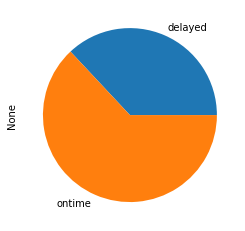

In [33]:
flight_df.groupby('Delayed').size().plot(kind='pie')

<AxesSubplot:>

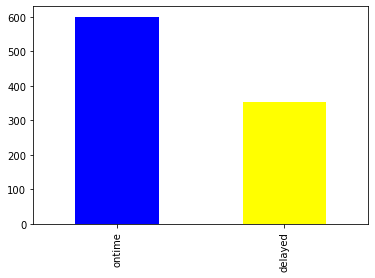

In [34]:
flight_df['Delayed'].value_counts().plot.bar(color=['blue', 'yellow'])

#### Delay based on the Day of the week

In [35]:
w =pd.DataFrame(flight_df.groupby(['Day of the Week','Delayed']).size())
w.rename(columns={0:'Count'}, inplace=True)
w =w.reset_index()
w=w.set_index(['Delayed','Day of the Week']).unstack(['Delayed'])

<AxesSubplot:xlabel='Day of the Week'>

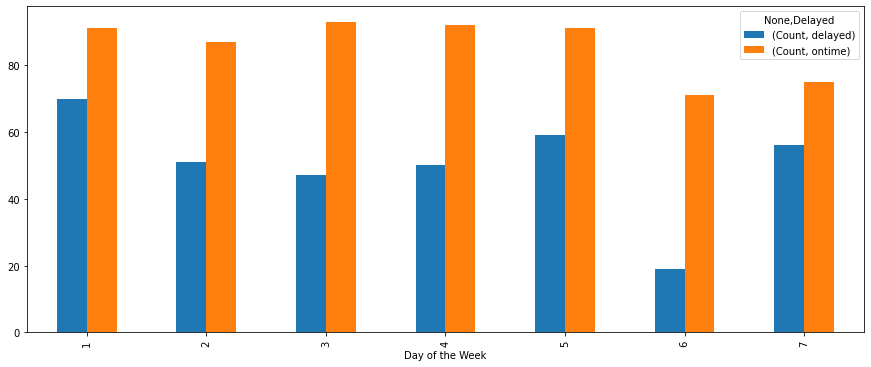

In [36]:
w.plot(kind='bar', figsize=(15,6))

 From the plot it can be seen that the flight is delayed realatively higher in the 1st, 5th, and 7th day of the week

#### Delay ratio based on the origin

<AxesSubplot:xlabel='Delayed', ylabel='Count'>

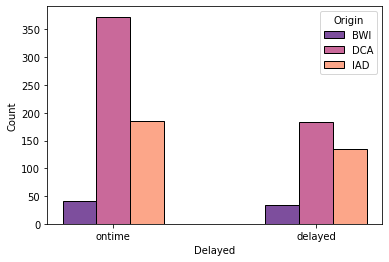

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(flight_df,x='Delayed',hue='Origin', multiple="dodge", palette=("magma"), shrink=.5)

The more flights are from  the origin BWI and the most number of delayed flights is also from the origin BWI.

#### Delay ratio based on the Destination

<AxesSubplot:xlabel='Delayed', ylabel='Count'>

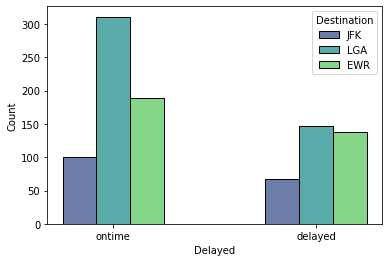

In [38]:
plt.figure(figsize=(6,4))
sns.histplot(flight_df,x='Delayed',hue='Destination', multiple="dodge", palette=("viridis"), shrink=.5)

The flights to the destination LGA, EWR are highly delayed.

#### Delay based on Carrier

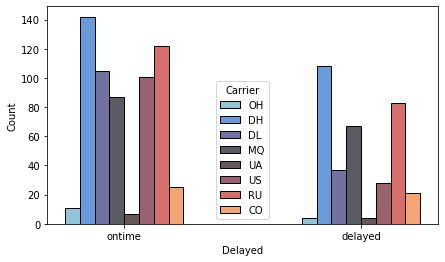

In [39]:
plt.figure(figsize=(7,4))
sns.histplot(flight_df,x='Delayed',hue='Carrier', multiple="dodge",  palette=("icefire"), shrink=0.5);

From the plots above, it can be observed that the higher the ratio of flight ontime and hence also the higher the number of flilghts delayed

### Step 4: Feature Engineering

#### Feature engineering:
    Feature Engineering involves converting the categorical features into numerical values. This can also be called as encoding.

Here, we simply replace the Delayed column variable into 0 and 1 with python code.
        
        0 => ontime
        1 => delayed

In [40]:
flight_df['Delayed'] = flight_df['Delayed'].replace('delayed',1).replace('ontime',0).astype(int)


Then the categorical columns are encoded with the pandas get_dummies method which is equivalent to OneHotEncoder of scikit learn module.


In [41]:
def dummies(data, col):
    temp = pd.get_dummies(data[col])
    data = pd.concat([data, temp], axis =1)
    data.drop([col], axis =1, inplace=True)
    return data

In [42]:
flight_df = dummies(flight_df, 'Origin')
flight_df = dummies(flight_df, 'Carrier')
flight_df = dummies(flight_df, 'Destination')
flight_df = dummies(flight_df, 'Day of the Week')

##### Now look at the correlation between the features of the flight_df

In [43]:
flight_df.corr()

,Departure_time,Delayed,BWI,DCA,IAD,CO,DH,DL,MQ,OH,...,EWR,JFK,LGA,1,2,3,4,5,6,7
Departure_time,1.000000,0.190571,-0.042141,-0.031741,0.057139,0.056548,0.119727,-0.021972,-0.050918,0.026667,...,0.022438,0.102485,-0.099337,-0.010871,0.005904,0.013443,-0.011420,-0.035882,-0.071616,0.102559
Delayed,0.190571,1.000000,0.050635,-0.096937,0.072231,0.040504,0.076957,-0.094701,0.059440,-0.027018,...,0.078321,0.030049,-0.097312,0.060780,-0.000156,-0.029274,-0.015296,0.021130,-0.106185,0.047773
BWI,-0.042141,0.050635,1.000000,-0.347264,-0.208088,-0.065894,-0.174515,-0.122443,-0.128466,0.432658,...,0.281130,0.018900,-0.281579,-0.007113,-0.020731,-0.011333,-0.034882,0.023361,0.012123,0.041649
DCA,-0.031741,-0.096937,-0.347264,1.000000,-0.844978,0.189752,-0.650511,0.352592,0.369939,-0.150247,...,-0.320201,-0.144113,0.414026,0.004558,0.001565,0.024610,0.047385,-0.004462,-0.055799,-0.028753
IAD,0.057139,0.072231,-0.208088,-0.844978,1.000000,-0.160336,0.778020,-0.297933,-0.312590,-0.090031,...,0.173651,0.139535,-0.271255,-0.000698,0.010191,-0.019205,-0.029531,-0.008668,0.051286,0.006238
CO,0.056548,0.040504,-0.065894,0.189752,-0.160336,1.000000,-0.134467,-0.094344,-0.098986,-0.028510,...,0.311516,-0.103929,-0.216962,0.002883,0.018532,0.017085,0.001907,0.010112,-0.056066,-0.004690
DH,0.119727,0.076957,-0.174515,-0.650511,0.778020,-0.134467,1.000000,-0.249864,-0.262156,-0.075505,...,-0.049623,0.302173,-0.182850,-0.001779,0.025497,-0.018634,-0.042146,-0.035320,0.068252,0.018008
DL,-0.021972,-0.094701,-0.122443,0.352592,-0.297933,-0.094344,-0.249864,1.000000,-0.183933,-0.052976,...,-0.302856,-0.053569,0.328618,-0.015847,0.011859,0.009305,0.039889,-0.011120,-0.014355,-0.021740
MQ,-0.050918,0.059440,-0.128466,0.369939,-0.312590,-0.098986,-0.262156,-0.183933,1.000000,-0.055582,...,-0.317755,0.112395,0.216448,0.007274,0.005481,0.002843,-0.007772,0.013587,-0.034698,0.006698
OH,0.026667,-0.027018,0.432658,-0.150247,-0.090031,-0.028510,-0.075505,-0.052976,-0.055582,1.000000,...,-0.091519,0.274317,-0.121827,0.010424,-0.004178,-0.004903,-0.005621,-0.008414,0.016777,-0.001569


From the correlation matrix above it can be seen that there is no feature that is highly coorelated with the delayed class.

This can be verified with the pairplot of the DataFrame and the heatmap for the features of the dataFrame.

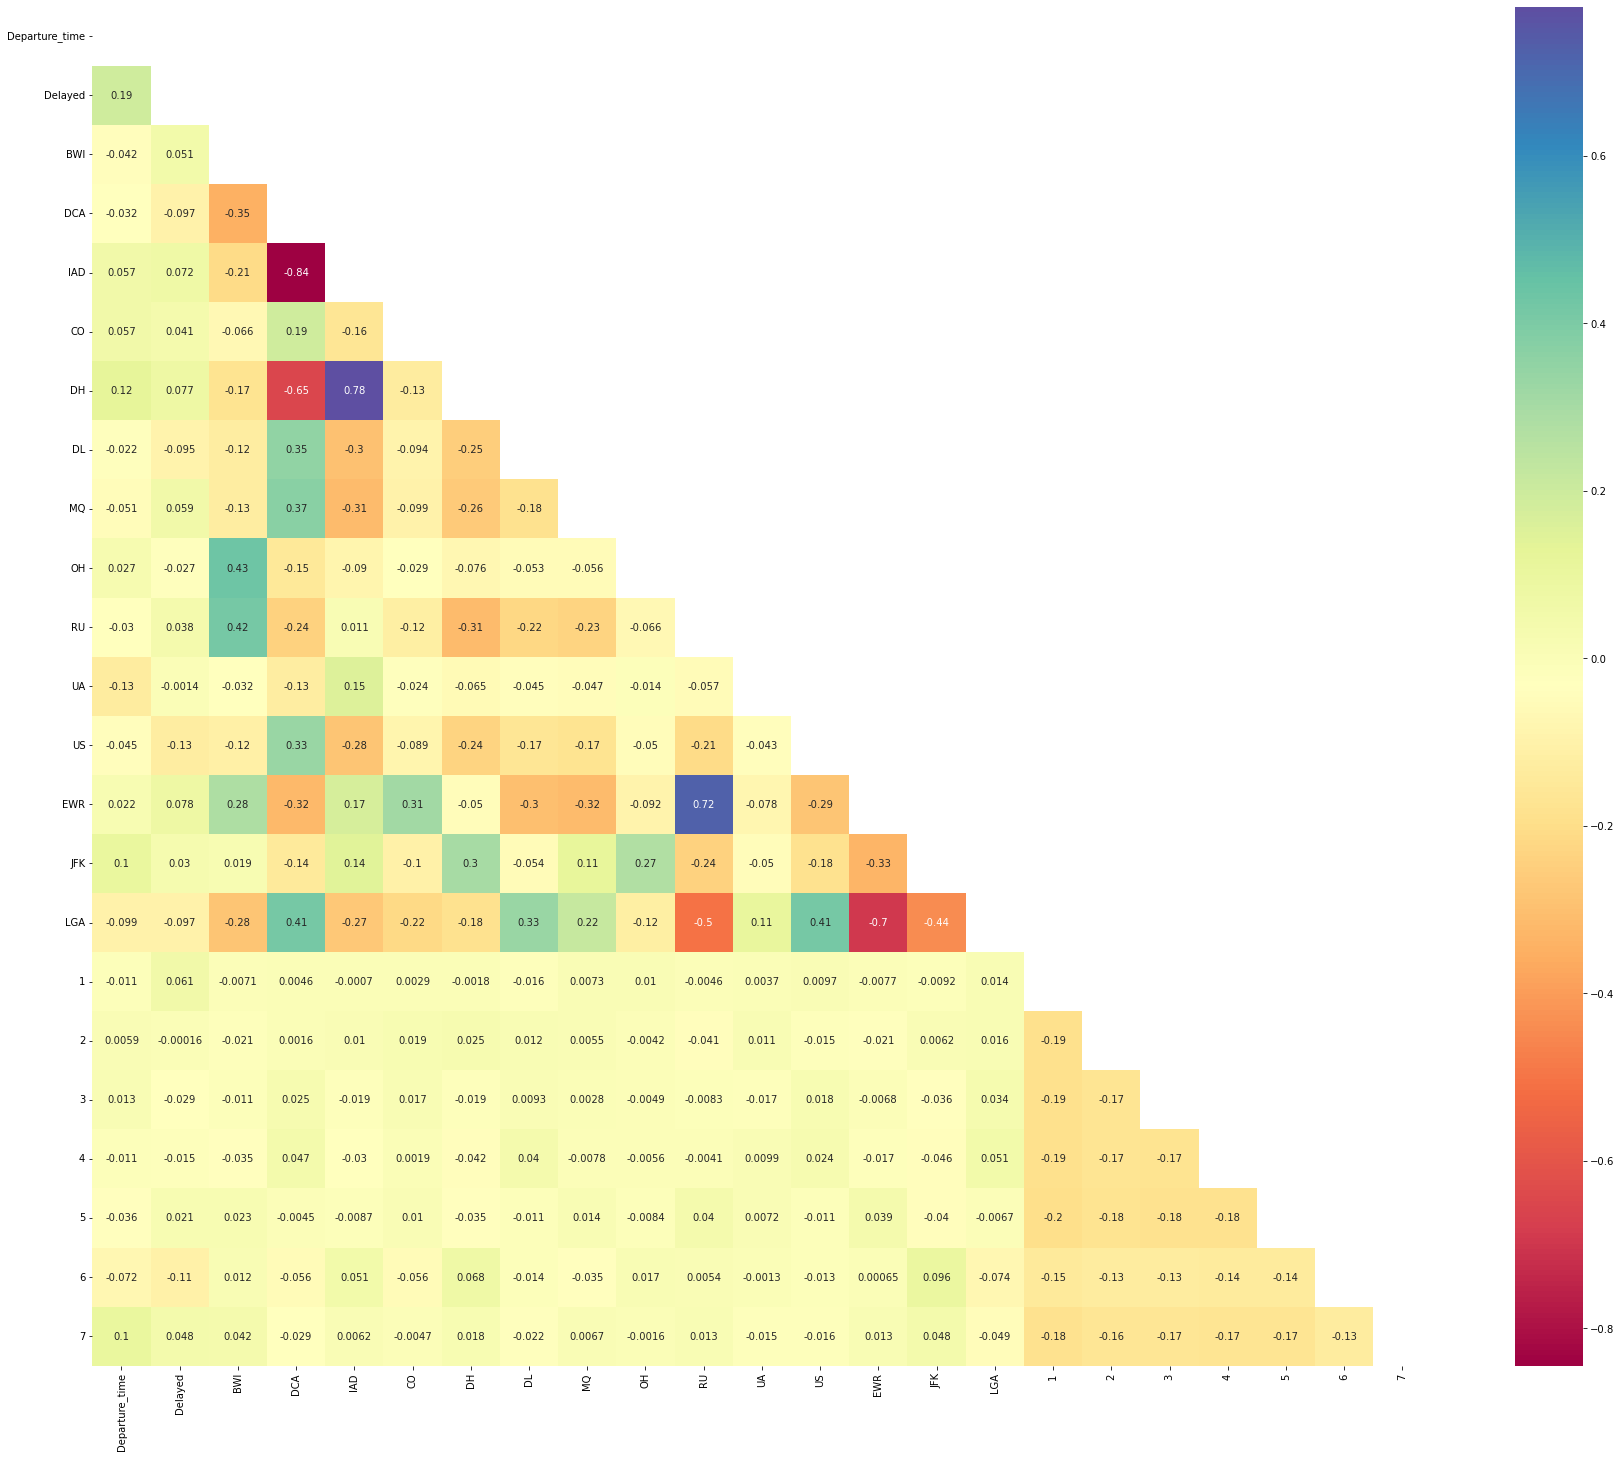

In [44]:
plt.figure(figsize = (30, 25))
sns.heatmap(flight_df.corr(), annot = True, cmap = "Spectral", mask = np.triu(flight_df.corr()))
plt.show()

The model we are going to train is Gaussian Naiove Bayes. Hence feature scaling does not affect the performance of the model as it is not distance based.

### Step 4: Model Development

###### X => Features
###### y => Class

In [45]:
X = flight_df.drop(columns = ['Delayed'])

In [46]:
y = flight_df['Delayed']

Splitting the dataset into training and testing samples.

Stratifying the y or class variable gives equal ratio of y column split in train and test dataset

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=10,test_size=99, stratify=y)

######  Training the Gaussian Naive Bayes model with the training dataset

In [48]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

In [49]:
pred=gaussian_nb.predict(X_test)

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Step 5: Model Evaluation

The performance of the model can be evaluated with some the evaluation metrics like:
    
    1. Accuracy score
    2. Precision
    3. Recall
    4. F1_score
    
These metrics are calculated using the confusion matrix of the model.

In [50]:
def evaluate_metrics(yt,y_pr):
    return pd.Series({'accuracy':accuracy_score(yt, y_pr),
                      'precision':precision_score(yt, y_pr),
                      'recall':recall_score(yt,y_pr),
                      'f1_score':f1_score(yt, y_pr)},
                      ).to_frame()

In [51]:
evaluate_metrics(y_test, pred)

,0
accuracy,0.646465
precision,0.519231
recall,0.729730
f1_score,0.606742


The model's accuracy is 0.6464 which is 64% which reveals 64 percent the model predicts the delay of the flight correctly.

###### Plotting confusion matrix

In [52]:
cf = confusion_matrix(y_test, pred)

Text(33.0, 0.5, 'Actual')

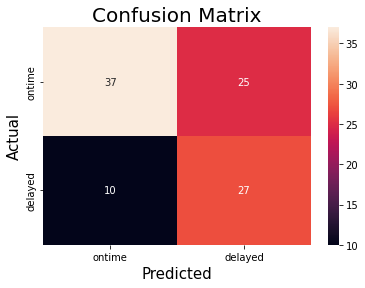

In [53]:
plt.title('Confusion Matrix',  fontsize=20)
s = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["ontime", "delayed"], yticklabels=["ontime", "delayed"])
s.set_xlabel('Predicted', fontsize=15)
s.set_ylabel('Actual', fontsize=15)

From the confusion matrix following details can be derived:
    
out of 99 test samples,
    
    37 instances are predicted correctly as ontime
    27 instances are predicted correctly as delayed
    25 instances are mistakenly predicted as delayed but is actually ontime class
    10 instances are mistakenly predicted as ontime but is actually delayed class

### Next Step:

1. The accuracy of the model is 0.6464 which is 64%. To improve the performance of the model we need more data as after selecting the feature and removing the duplicates we get only 952 examples.

2. Shall add some more feature like climate and weather conditions to the dataset which improves quality of information to predict flight delay.